## 2.2 Create GroupBy

In [1]:
from IPython.display import Image

GroupBy is the first part of the split, apply, combine workflow. The object returned by `groupby()` is a group of data frames in a dict-like structure.

**Split**  
The *grouby()* method splits the dataframe into a group of dataframes, and keeps all the sub-dataframes bundled in an iterable dict-like structure.

In [5]:
Image(url='https://github.com/alfredessa/pdacookbook/blob/master/images/groupby1.jpg?raw=true')

**Apply**  
Once we have a grouped object, we can apply functions to a single grouped df, set of grouped df, or all data frames in the grouped object.

In [6]:
Image(url='https://github.com/alfredessa/pdacookbook/blob/master/images/groupby2.jpg?raw=true')

**Combine**   
We're still able to combine results into new data structures.

In [7]:
Image(url='https://github.com/alfredessa/pdacookbook/blob/master/images/groupby3.jpg?raw=true')

### 3.11 Load MLB salaries dataset

In [8]:
import pandas

In [11]:
# load the dataset
url = 'https://raw.github.com/alfredessa/pdacookbook/master/data/mlbsalaries.csv'

mlb = pandas.read_csv(url)

mlb.head()

,Year,Player,Salary,Position,Team
0,1988,Mike Witt,1400000,Pitcher,Los Angeles Angels
1,1988,George Hendrick,989333,Outfielder,Los Angeles Angels
2,1988,Chili Davis,950000,Outfielder,Los Angeles Angels
3,1988,Brian Downing,900000,Designated Hitter,Los Angeles Angels
4,1988,Bob Boone,883000,Catcher,Los Angeles Angels


###  3.12 Grouby using the Year column

In [17]:
# split mlb into data frames for each year reported
grouped = mlb.groupby('Year')

In [18]:
# this obj is a group of df's; using head() would head EVERY df in the group
# we can confirm type though
type(grouped)

pandas.core.groupby.DataFrameGroupBy

In [20]:
# the group is iterable, so:
for k, group in grouped:
    print k
    print group.head()
    
# make more sense now?    
# There is a df for each year, containing all player & salary info

1988
   Year           Player   Salary           Position                Team
0  1988        Mike Witt  1400000            Pitcher  Los Angeles Angels
1  1988  George Hendrick   989333         Outfielder  Los Angeles Angels
2  1988      Chili Davis   950000         Outfielder  Los Angeles Angels
3  1988    Brian Downing   900000  Designated Hitter  Los Angeles Angels
4  1988        Bob Boone   883000            Catcher  Los Angeles Angels
1989
     Year         Player   Salary    Position                Team
686  1989      Mike Witt  1400000     Pitcher  Los Angeles Angels
687  1989    Chili Davis  1275000  Outfielder  Los Angeles Angels
688  1989  Brian Downing  1250000  Outfielder  Los Angeles Angels
689  1989  Bert Blyleven  1225000     Pitcher  Los Angeles Angels
690  1989  Lance Parrish  1000000     Catcher  Los Angeles Angels
1990
      Year         Player   Salary       Position                Team
1396  1990  Lance Parrish  1916667        Catcher  Los Angeles Angels
1397  1990 

### 3.13 Use Generator Comprehension to go inside each data frame

In [24]:
# go inside each df & extract highest paid player for each year

# write a generator comprehension statement that
# 1) Sorts df by descending salary
# 2) Subsets the first (highest) salary
# 3) Applies 1:2 to each df in grouped
t = (group.sort_index(by='Salary', ascending=False)[:1] for yr,group in grouped)

In [26]:
# what's it look like?
t

<generator object <genexpr> at 0x7ffe0ee94cd0>

### Create new data frame of results

In [27]:
# initialize empty df -- vectorization!
topsalaries = pandas.DataFrame()

In [29]:
# loop through the generator object t and extract the top salaries
for line in t:
    topsalaries = topsalaries.append(line)
    
topsalaries    

,Year,Player,Salary,Position,Team
321,1988,Gary Carter,2360714,Catcher,New York Mets
908,1989,Orel Hershiser,2766666,Pitcher,Los Angeles Dodgers
1580,1990,Robin Yount,3200000,Outfielder,Milwaukee Brewers
2590,1991,Darryl Strawberry,3800000,Outfielder,Los Angeles Dodgers
3441,1992,Bobby Bonilla,6100000,Outfielder,New York Mets
4214,1993,Bobby Bonilla,6200000,Outfielder,New York Mets
4977,1994,Bobby Bonilla,6300000,Third Baseman,New York Mets
6068,1995,Cecil Fielder,9237500,First Baseman,Detroit Tigers
6840,1996,Cecil Fielder,9237500,First Baseman,Detroit Tigers
7666,1997,Albert Belle,10000000,Outfielder,Chicago White Sox


### Create series of topsalaries and performance plots

In [30]:
# subset 2 columns
ts = topsalaries[['Year','Salary']]

ts.head()

,Year,Salary
321,1988,2360714
908,1989,2766666
1580,1990,3200000
2590,1991,3800000
3441,1992,6100000


In [31]:
# set the Year as index
ts = ts.set_index(ts.Year)

ts.head(3)

,Year,Salary
Year,,
1988,1988,2360714
1989,1989,2766666
1990,1990,3200000


In [37]:
import matplotlib

# for making plots appear
%pylab inline

Populating the interactive namespace from numpy and matplotlib


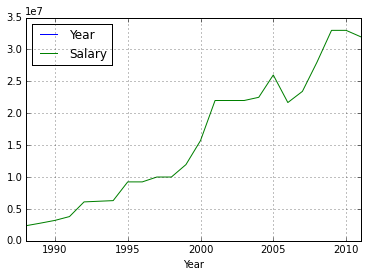

In [38]:
ts.plot()

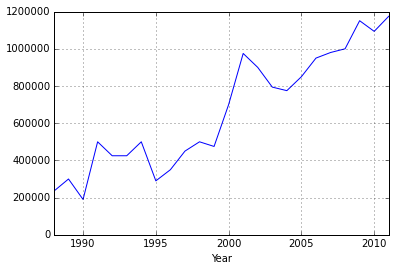

In [39]:
# apply the median() function, then plot results

grouped['Salary'].median().plot()